#  AIR QUALITY

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. Used ML algorithms and visualisation to represent this dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
a = pd.read_csv("AirQuality.csv",sep = ';')
a

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(a.columns.tolist())

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


In [4]:
a.drop(['Unnamed: 15','Unnamed: 16'], axis = 1, inplace = True, errors = 'ignore')

In [5]:
b = a.replace(',', '.', regex=True)
# c = b.apply(pd.to_numeric, errors='ignore')

In [6]:
b.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
b.dropna(inplace=True)

In [8]:
b.shape

(9357, 15)

In [9]:
b.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [10]:
b.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [11]:
b.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [12]:
b.drop(['Date','Time'],axis=1,inplace=True)
b

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [13]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   object 
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   object 
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   object 
 11  RH             9357 non-null   object 
 12  AH             9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 1023.4+ KB


In [14]:
c = b.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})

In [15]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


#  CORRELATION

In [17]:
c.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


In [18]:
d = c.drop(['PT08.S1(CO)'], axis = 1)
d

,CO(GT),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


#  TRAIN TEST SPLIT

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = d[['NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',	'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH','AH']]
x

,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [22]:
y = d[["CO(GT)"]]
y

,CO(GT)
0,2.6
1,2.0
2,2.2
3,2.2
4,1.6
...,...
9352,3.1
9353,2.4
9354,2.4
9355,2.1


In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
xtrain,xtest,ytrain,ytest

(      NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
 4367    -200.0    -200.0         -200.0   -200.0        -200.0   -200.0   
 794       68.0       3.7          692.0     88.0        1176.0     82.0   
 8496    -200.0       2.9          648.0    188.0        1007.0    132.0   
 3027    -200.0      16.7         1200.0    185.0         686.0    159.0   
 8508    -200.0       0.2          402.0     34.0        1665.0     31.0   
 ...        ...       ...            ...      ...           ...      ...   
 5734    -200.0      24.8         1425.0    595.0         457.0    143.0   
 5191    -200.0       1.5          543.0   -200.0        1276.0   -200.0   
 5390    -200.0      24.3         1412.0    446.0         494.0    104.0   
 860      542.0      19.5         1282.0    231.0         681.0    129.0   
 7270    -200.0      16.5         1195.0    625.0         509.0    180.0   
 
       PT08.S4(NO2)  PT08.S5(O3)      T     RH        AH  
 4367        -200.0       -

#  LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
e = LinearRegression()
e

LinearRegression()

In [27]:
e.fit(xtrain,ytrain)

LinearRegression()

In [28]:
e.score(xtest,ytest)

0.516023785055346

In [29]:
e.predict(xtest)

array([[ -26.91075849],
       [ -35.23316434],
       [  -7.09219921],
       ...,
       [ -31.96393989],
       [  -4.71064133],
       [-144.17641419]])

<!-- #  SVM(SUPPORT VECTOR MACHINE) -->

#  SVM(SUPPORT VECTOR MACHINE)

In [31]:
# f = SVR()
# f.fit( xtrain, ytrain)

In [47]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
pipeline.fit(xtrain, ytrain)
predictions = pipeline.predict(xtest)

mse = mean_squared_error(ytest, predictions)
print("SVR Mean Squared Error:", mse)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR Mean Squared Error: 2881.84144692272


#  DECISION TREE REGRESSOR

In [50]:
from sklearn import tree
f = tree.DecisionTreeRegressor()
f.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [52]:
f.score(xtest,ytest)

0.30206953516654067

In [54]:
f.predict(xtest)

array([   1.3, -200. ,    2.7, ...,    0.9,    2.2,    1.5])

#  RANDOM FOREST REGRESSOR

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
g = RandomForestRegressor(n_estimators = 60)
g.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=60)

In [61]:
g.score(xtest,ytest)

0.6394004821715626

In [63]:
g.predict(xtest)

array([ -18.84166667,  -56.08666667,    2.565     , ...,  -22.41      ,
          2.25833333, -193.28      ])

#  K-NEIGHBORS REGRESSOR

In [66]:
from sklearn.neighbors import KNeighborsRegressor
h = KNeighborsRegressor(n_neighbors = 4)

In [68]:
h.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=4)

In [70]:
h.score(xtest,ytest)

0.5609384569474414

In [72]:
h.predict(xtest)

array([[ -49.125],
       [   0.9  ],
       [   3.2  ],
       ...,
       [   1.175],
       [   2.25 ],
       [-200.   ]])

#  XG BOOST

In [75]:
from xgboost import XGBRegressor
i= XGBRegressor()
i.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
i.score(xtest,ytest)

0.6118841280155798

In [79]:
i.predict(xtest)

array([  -6.3789377 ,  -80.25032   ,    0.19601509, ...,   -9.07086   ,
          4.8376303 , -188.31349   ], dtype=float32)

#  VISUALISATION

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

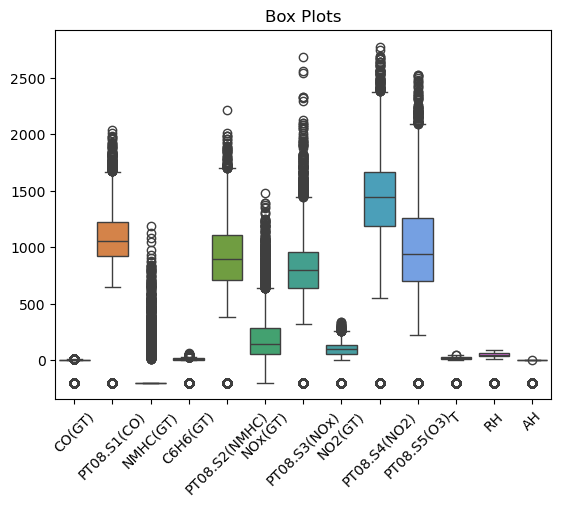

In [90]:
sns.boxplot(c)
plt.xticks(rotation=45)
plt.title('Box Plots');

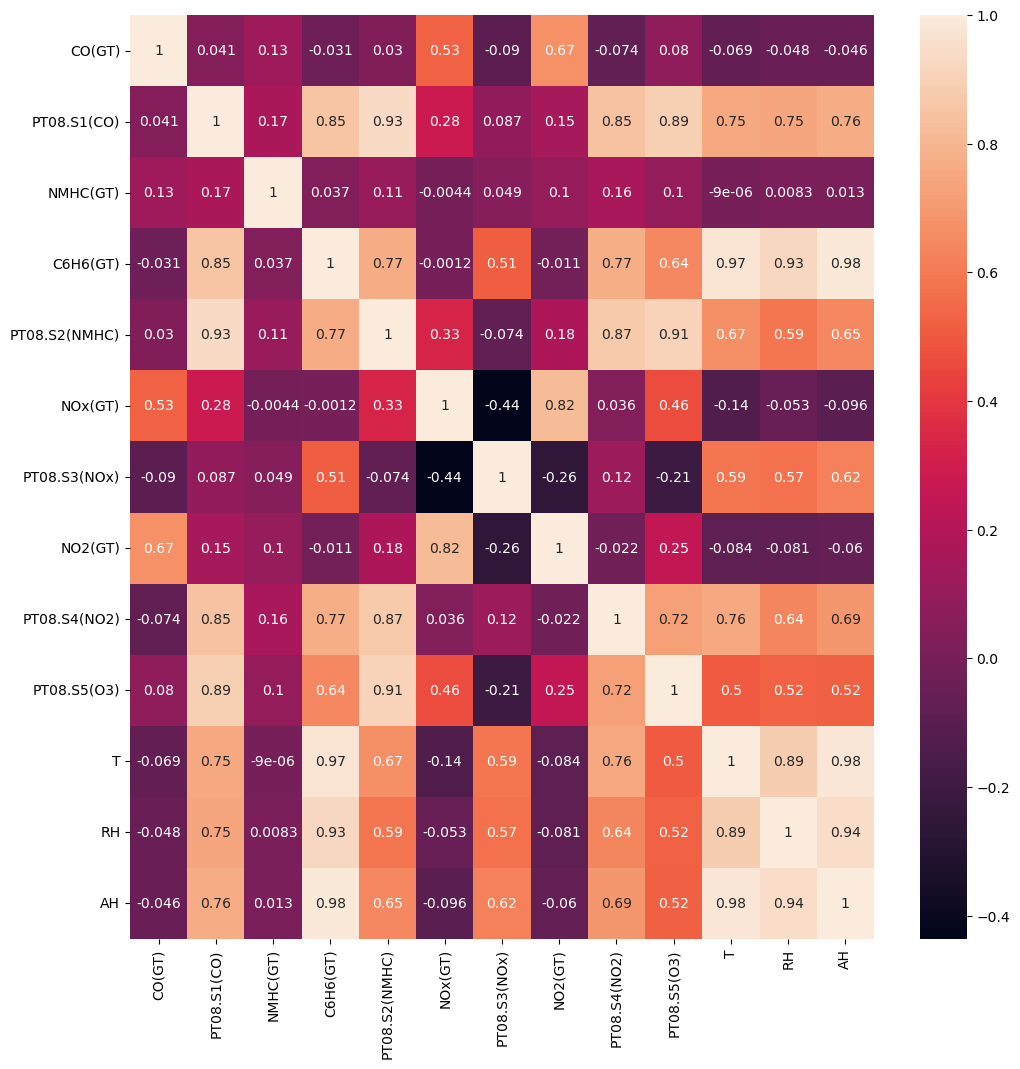

In [92]:
plt.figure(figsize=(12,12))
sns.heatmap(c.corr(),annot=True)
plt.show()

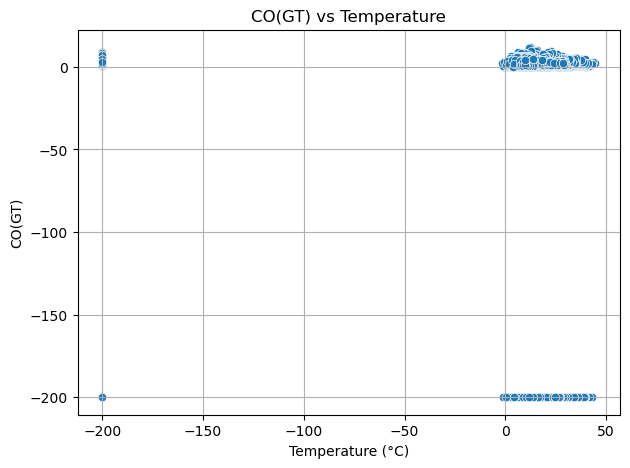

In [98]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=c['T'].astype(float), y=c['CO(GT)'].astype(float))
plt.title('CO(GT) vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()


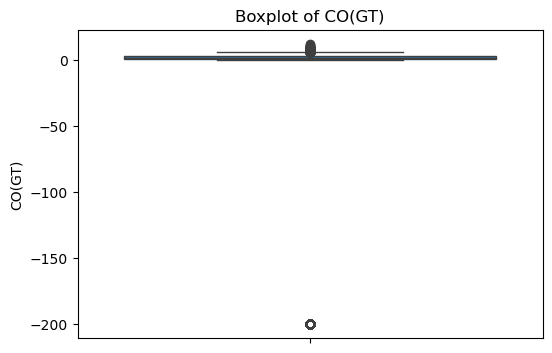

In [100]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=c['CO(GT)'].astype(float))
plt.title('Boxplot of CO(GT)')
plt.ylabel('CO(GT)')
plt.show()

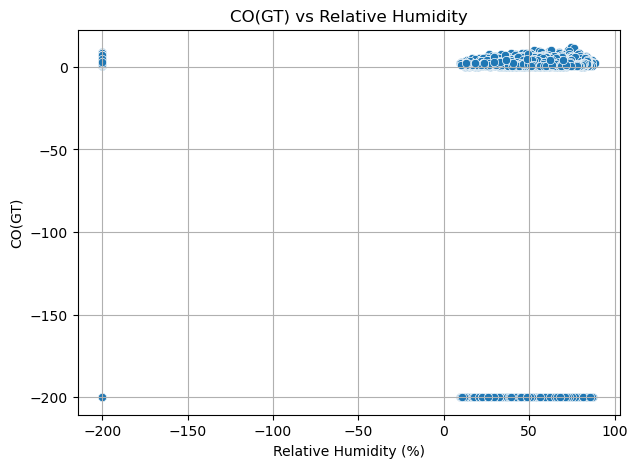

In [102]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=c['RH'].astype(float), y=c['CO(GT)'].astype(float))
plt.title('CO(GT) vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()